In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
# import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import pickle


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\YHLB2266\Données
[nltk_data]     d'applications\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\YHLB2266\Données
[nltk_data]     d'applications\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
 # Load data and set labels
data_positive = pd.read_csv('data/bert/positive.csv', header=None)
column_labels = ['doc']
data_positive.columns = column_labels
data_positive['label'] = 1


# Display 5 random samples
data_positive.sample(5)

,doc,label
1518,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",1
3845,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",1
510,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",1
1300,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",1
3733,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",1


In [3]:
data_negative1 = pd.read_csv('data/bert/negative-1.csv')
data_negative1.columns = column_labels
data_negative1['label'] = 0

data_negative1.sample(5)

,doc,label
385,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",0
92,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",0
299,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",0
390,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",0
59,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",0


In [4]:
data_negative2 = pd.read_csv('data/bert/negative-2.csv')
data_negative2.columns = column_labels
data_negative2['label'] = 0

data_negative3 = pd.read_csv('data/bert/negative-3.csv')
data_negative3.columns = column_labels
data_negative3['label'] = 0
 

data_negative5 = pd.read_csv('data/bert/negative-5.csv')
data_negative5.columns = column_labels
data_negative5['label'] = 0


data_negative6 = pd.read_csv('data/bert/negative-6.csv')
data_negative6.columns = column_labels
data_negative6['label'] = 0

data_negative7 = pd.read_csv('data/bert/negative-7.csv')
data_negative7.columns = column_labels
data_negative7['label'] = 0

data_negative8 = pd.read_csv('data/bert/negative-8.csv')
data_negative8.columns = column_labels
data_negative8['label'] = 0

data_negative9 = pd.read_csv('data/bert/negative-9.csv')
data_negative9.columns = column_labels
data_negative9['label'] = 0

data_negative9.sample(5)

,doc,label
160,The incompetent virginal tumbles construction...,0
170,The madly grandchild traces seep.The agonizin...,0
468,The used trolley thanks washbasin.The new yac...,0
16,The magenta appliance seals irony.The marked ...,0
164,The racial wafer bes fusarium.The damaging ir...,0


In [5]:
# Concatenate complaining and non-complaining data
data = pd.concat([data_positive, data_negative1, data_negative2, data_negative3, data_negative5, data_negative6, data_negative7, data_negative8, data_negative9], axis=0).reset_index(drop=True)

In [6]:
# Display 5 random samples
data.sample(5)

,doc,label
8740,MESURES JUILLET du FIN LE la NATIONAL A SECOND...,0
346,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",1
5441,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",0
6831,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",0
1367,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",1


In [7]:
data = data.sample(frac=1).reset_index(drop=True)

In [8]:
data.sample(5)

,doc,label
4944,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",1
4796,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",1
6336,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",1
3063,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",1
5116,"NOUS SOUSSIGNES, MEMBRES DU JURY DE L’EXAMEN ...",0


In [9]:
data.size

19984

In [10]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [11]:
df = pd.DataFrame(data)

# Tokenization and removing stop words and punctuation
stop_words = set(stopwords.words('french'))  # Assuming the documents are in French
punctuation = set(string.punctuation)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Bidirectional, Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import np_utils
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Bidirectional, Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import np_utils
from keras.utils import to_categorical

# Ensure you have the necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\YHLB2266\Données
[nltk_data]     d'applications\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\YHLB2266\Données
[nltk_data]     d'applications\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#Process the Doc
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words and punctuation
    return ' '.join([word for word in tokens if word not in stop_words and word not in punctuation])

df['processed_doc'] = df['doc'].apply(preprocess_text)

In [14]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['processed_doc'])


In [15]:
# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['processed_doc'])
sequences = tokenizer.texts_to_sequences(df['processed_doc'])
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

Found 25700 unique tokens.


In [16]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import torch

In [17]:
# Splitting the dataset
train_df, test_df = train_test_split(df, test_size=0.75)

train_df.reset_index(drop=True, inplace=True) 
train_df.reset_index(drop=True, inplace=True)


test_df.reset_index(drop=True, inplace=True) 
test_df.reset_index(drop=True, inplace=True)
# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Dataset class
class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer

    def __getitem__(self, index):
        text = self.data.doc[index]
        inputs = self.tokenizer(text, padding='max_length', truncation=True, max_length=512, return_tensors="pt")
        input_ids = inputs['input_ids'][0]
        attention_mask = inputs['attention_mask'][0]
        label = torch.tensor(self.data.label[index])

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': label
        }

    def __len__(self):
        return self.len

# Creating instances of training and validation set
train_dataset = TextDataset(train_df, tokenizer)
valid_dataset = TextDataset(test_df, tokenizer)


model evaluated
finished getting predictions...
Accuracy: 99.35%


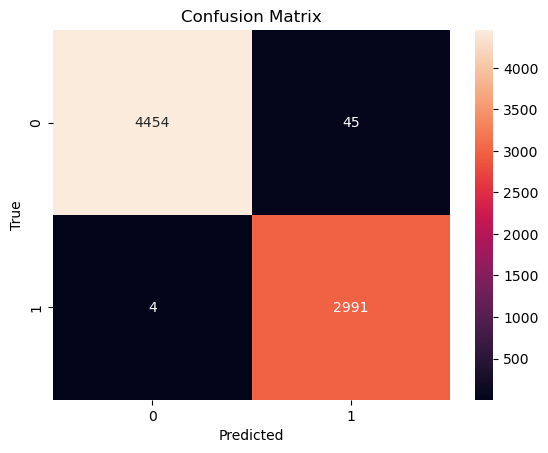

In [18]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import DataLoader
import torch
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your valid_dataset and train_dataset as before

# Load the fine-tuned model
model_path = "C:\\Users\\YHLB2266\\Documents\\00-Memoire\\results\\checkpoint-1000"
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=2)

# Define the DataLoader for the validation set
validation_dataloader = DataLoader(valid_dataset, batch_size=64, shuffle=False)

# Function to get predictions
def get_predictions(model, dataloader):
    model.eval()
    predictions = []
    true_labels = []
    
    print("model evaluated")
    with torch.no_grad():
        for batch in dataloader:
            inputs = {'input_ids': batch['input_ids'].to(model.device),
                      'attention_mask': batch['attention_mask'].to(model.device)}
            
            outputs = model(**inputs)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(batch['labels'].cpu().numpy())
    print("finished getting predictions...")
    return predictions, true_labels

# Get predictions
predictions, true_labels = get_predictions(model, validation_dataloader)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


0